# README.md

###For each pt with an ADT ending date, find its T date and T value soon after 

# Step1, read from spreadsheet, clean up, and get statistics

In [6]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
from datetime import timedelta, date
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [7]:
df1=pd.read_csv("./data/bigcohort_bothok_new.csv", header=0)
df1.fillna('', inplace=True)
df1['inital_ADT_end_date'] = pd.to_datetime(df1['inital_ADT_end_date'])

df2=pd.read_excel("./data/pca_tresults_20210119_BP_fixed.xlsx", header=0)
#df3=pd.read_csv("just_start_empty.csv", header=0)

In [8]:
df1[:1]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [9]:
df2[:1]

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
0,2,2,2003,1.0,7.0,2003-01-07,2006-09-05,49041-7,TESTOSTERONE,351.0


In [10]:
list_pts_adt_table=df1["person_id"].to_list()
list_pts_tvalue_table=df2["person_id"].to_list()

print("pt number in the adt table is:")
print(len(list_pts_adt_table))
print("")
print("pt number in the T value table is:")
print(len(list_pts_tvalue_table))

pt number in the adt table is:
940

pt number in the T value table is:
18643


In [11]:
index_list=df2.columns
index_list

Index(['person_id', 'cancer_type_id', 'year_of_diagnosis',
       'month_of_diagnosis', 'day_of_diagnosis', 'dx_date', 'result_date',
       'loinc_code', 'source_test_name', 'test_results'],
      dtype='object')

In [12]:
print(df2.shape)
#delete some useless columns
del_col=['cancer_type_id', 'year_of_diagnosis', 'month_of_diagnosis', 'day_of_diagnosis', 'dx_date','loinc_code', 'source_test_name']

for col in del_col:
    del df2[col]
print(df2.shape)

(18643, 10)
(18643, 3)


In [13]:
y=2

df1_pt=df1[(df1["person_id"] == y)]
df2_pt=df2[(df2["person_id"] == y)]

In [14]:
df1_pt

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [15]:
df2_pt

,person_id,result_date,test_results
0,2,2006-09-05,351.00
1,2,2007-01-09,304.00
2,2,2007-05-17,259.00
3,2,2007-06-12,382.00
4,2,2007-06-28,439.00
...,...,...,...
77,2,2017-02-01,15.64
78,2,2017-02-22,7.72
79,2,2017-03-18,11.29
80,2,2017-03-22,11.14


In [16]:
def closest(lst, K): 
      return lst[min(range(len(lst)), key = lambda i: abs(lst[i] - K))] 

In [17]:
df2_pt=df2[(df2["person_id"] == 2)]    
each_pt_tdates = df2_pt['result_date'].to_list()
#each_pt_tdates

In [18]:
result_list=[]

#for y in list_pts:      
for y in [2]:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    #a_plus_6mons=a + timedelta(days=180)
    
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    N_t_dates=len(cleaned_aaa)
    #only keep the ones after ADT end date
    cleaned_aaaa= [x for x in cleaned_aaa if x >=a]
    start_sorted_bin=sorted(cleaned_aaaa)
    #count 
    N_t_dates_afterADT=len(cleaned_aaaa)
    if(len(start_sorted_bin)==0):
        tdate='NaN'  

    if(len(start_sorted_bin)>0):
        #apply the closet function
        #tdate=closest(start_sorted_bin,a_plus_6mons)
        tdate=closest(start_sorted_bin,a)
        #tvalue=df2_pt.loc[df['result_date'] == tdate].test_result
    
    #pick up T-value for T-date
    df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
    tvalue=df2_pt_pick.test_results.values[0]
    
    print(y, a, gap,tdate, tvalue,N_t_dates,N_t_dates_afterADT)
    result_per_pt=[y, a, gap, tdate, tvalue,N_t_dates,N_t_dates_afterADT]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-02-01 00:00:00 15.64 82 5


In [19]:
#do it for all pts in the list
#this is for the T date and value immedately after the ADT end date

In [20]:
result_list=[]

#for y in list_pts:      
for y in list_pts_adt_table:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    #a_plus_6mons=a + timedelta(days=180)
    
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    N_t_dates=len(cleaned_aaa)

    
    #only keep the ones after ADT end date
    cleaned_aaaa= [x for x in cleaned_aaa if x >=a]
    start_sorted_bin=sorted(cleaned_aaaa)
    N_t_dates_afterADT=len(cleaned_aaaa)
    
    if(len(start_sorted_bin)==0):
        tdate='NaN' 
        tvalue="NaN"

    if(len(start_sorted_bin)>0):
        #apply the closet function
        #tdate=closest(start_sorted_bin,a_plus_6mons)
        tdate=closest(start_sorted_bin,a)
        #tvalue=df2_pt.loc[df['result_date'] == tdate].test_result
    
        #pick up T-value for T-date
        df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
        tvalue=df2_pt_pick.test_results.values[0]
    
    print(y, a, gap,tdate, tvalue,N_t_dates,N_t_dates_afterADT)
    result_per_pt=[y, a, gap, tdate, tvalue,N_t_dates,N_t_dates_afterADT]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-02-01 00:00:00 15.64 82 5
13 2018-05-17 00:00:00 2891.0 NaN NaN 23 0
18 2014-03-13 00:00:00 121.0 2014-12-02 00:00:00 31.3 5 5
22 2017-04-24 00:00:00 2401.0 NaN NaN 3 0
25 2014-02-18 00:00:00 98.0 2015-02-18 00:00:00 149.89 12 11
26 2016-06-01 00:00:00 553.0 2016-06-15 00:00:00 15.75 14 7
37 2016-09-02 00:00:00 2165.0 2016-09-27 00:00:00 14.74 23 1
38 2016-07-18 00:00:00 243.0 2016-07-18 00:00:00 17.18 20 13
81 2014-04-01 00:00:00 188.0 2014-04-10 00:00:00 313.07 12 12
95 2014-04-23 00:00:00 1204.0 2014-04-28 00:00:00 10.0 25 1
119 2013-10-02 00:00:00 92.0 2013-11-15 00:00:00 18.24 12 10
125 2020-09-02 00:00:00 1682.0 NaN NaN 18 0
132 2016-07-13 00:00:00 457.0 2016-10-20 00:00:00 8.41 1 1
137 2015-06-01 00:00:00 485.0 2016-04-12 00:00:00 459.52 19 16
153 2020-02-12 00:00:00 2051.0 2020-02-12 00:00:00 3.0 2 1
267 2016-05-12 00:00:00 359.0 2016-05-23 00:00:00 7.77 35 28
275 2020-09-15 00:00:00 281.0 NaN NaN 12 0
300 2017-10-01 00:00:00 379.0 2018-02-21 0

6212 2014-01-15 00:00:00 182.0 2014-01-15 00:00:00 10.0 1 1
6237 2020-11-13 00:00:00 1130.0 NaN NaN 1 0
6241 2011-11-29 00:00:00 222.0 2012-01-23 00:00:00 9.96 5 5
6268 2020-01-15 00:00:00 84.0 2020-01-15 00:00:00 7.92 5 2
6405 2017-12-28 00:00:00 273.0 NaN NaN 2 0
6445 2016-11-01 00:00:00 334.0 2016-11-09 00:00:00 11.26 18 13
6475 2017-03-24 00:00:00 1242.0 2017-03-29 00:00:00 54.06 18 16
6542 2011-04-15 00:00:00 324.0 2012-11-09 00:00:00 260.46 1 1
6656 2016-12-29 00:00:00 192.0 2016-12-29 00:00:00 29.53 14 9
6794 2019-06-01 00:00:00 58.0 2019-06-27 00:00:00 13.6 3 2
6841 2020-08-24 00:00:00 3248.0 NaN NaN 6 0
6846 2019-01-08 00:00:00 1407.0 2019-01-08 00:00:00 6.97 14 2
6894 2014-10-15 00:00:00 3848.0 2014-11-17 00:00:00 14.11 10 10
6933 2019-07-15 00:00:00 1260.0 NaN NaN 1 0
6955 2016-06-15 00:00:00 366.0 2016-09-19 00:00:00 318.77 22 12
6958 2017-07-06 00:00:00 861.0 2017-07-06 00:00:00 3.0 8 1
6963 2020-09-04 00:00:00 455.0 NaN NaN 1 0
6997 2020-11-17 00:00:00 669.0 NaN NaN 1 0
7

14126 2019-05-13 00:00:00 91.0 2019-08-23 00:00:00 19.07 1 1
14192 2020-09-16 00:00:00 2026.0 NaN NaN 25 0
14196 2015-06-22 00:00:00 480.0 2015-06-22 00:00:00 30.28 13 1
14217 2017-06-01 00:00:00 171.0 2017-06-05 00:00:00 14.24 19 12
14221 2019-06-11 00:00:00 84.0 2019-09-04 00:00:00 11.31 2 1
14242 2020-09-14 00:00:00 1946.0 NaN NaN 19 0
14250 2017-01-18 00:00:00 962.0 2017-01-18 00:00:00 4.33 21 20
14278 2020-10-26 00:00:00 938.0 NaN NaN 15 0
14287 2020-10-12 00:00:00 546.0 2020-10-12 00:00:00 4.33 7 1
14471 2020-11-11 00:00:00 474.0 NaN NaN 25 0
14481 2018-10-18 00:00:00 402.0 2019-02-04 00:00:00 151.0 7 4
14486 2020-02-12 00:00:00 877.0 2020-02-12 00:00:00 11.0 13 1
14488 2015-02-04 00:00:00 70.0 NaN NaN 1 0
14536 2020-10-19 00:00:00 5009.0 NaN NaN 3 0
14678 2020-10-15 00:00:00 196.0 NaN NaN 2 0
14750 2018-12-11 00:00:00 1259.0 NaN NaN 1 0
14798 2014-12-08 00:00:00 1642.0 2014-12-08 00:00:00 10.16 28 13
14804 2020-09-03 00:00:00 155.0 NaN NaN 8 0
14854 2020-09-24 00:00:00 245.0 NaN

22754 2014-04-23 00:00:00 938.0 2014-05-15 00:00:00 10.0 5 1
22755 2018-10-22 00:00:00 187.0 NaN NaN 1 0
22817 2019-07-09 00:00:00 91.0 2019-12-06 00:00:00 289.62 1 1
22830 2011-10-17 00:00:00 60.0 2012-06-05 00:00:00 28.68 8 2
22833 2019-02-01 00:00:00 254.0 2019-02-13 00:00:00 16.73 10 4
22859 2019-03-11 00:00:00 87.0 2019-06-19 00:00:00 19.12 1 1
22860 2017-10-17 00:00:00 130.0 2017-10-17 00:00:00 3.0 7 6
22862 2011-10-05 00:00:00 84.0 2011-10-05 00:00:00 18.93 3 1
22895 2012-05-18 00:00:00 84.0 2012-10-03 00:00:00 82.93 1 1
23256 2017-09-01 00:00:00 1087.0 2017-12-14 00:00:00 6.72 30 14
23289 2018-04-19 00:00:00 280.0 NaN NaN 1 0
23305 2015-06-20 00:00:00 68.0 2015-07-13 00:00:00 19.3 7 7
23306 2020-11-18 00:00:00 2136.0 NaN NaN 20 0
23332 2020-08-31 00:00:00 1104.0 2020-10-12 00:00:00 7.98 15 1
23335 2018-02-20 00:00:00 1878.0 2018-02-20 00:00:00 164.35 7 4
23672 2015-06-04 00:00:00 686.0 NaN NaN 10 0
23942 2017-02-27 00:00:00 366.0 2017-02-27 00:00:00 17.76 46 43
23945 2018-03-06

30231 2016-04-07 00:00:00 30.0 2016-04-07 00:00:00 14.97 2 1
30259 2018-08-23 00:00:00 1256.0 NaN NaN 8 0
30277 2015-07-01 00:00:00 395.0 2015-09-28 00:00:00 0.0 1 1
30308 2020-11-06 00:00:00 212.0 NaN NaN 2 0
30453 2017-10-12 00:00:00 13.0 NaN NaN 1 0
30455 2020-05-26 00:00:00 1950.0 NaN NaN 5 0
30488 2019-03-27 00:00:00 2161.0 NaN NaN 18 0
30492 2018-09-07 00:00:00 91.0 2018-09-07 00:00:00 3.0 3 3
30526 2017-07-27 00:00:00 770.0 NaN NaN 1 0
30528 2016-07-19 00:00:00 105.0 2016-07-19 00:00:00 4.33 11 5
30554 2018-06-01 00:00:00 196.0 2018-06-06 00:00:00 15.39 31 21
30575 2013-12-01 00:00:00 356.0 2013-12-09 00:00:00 10.0 23 14
30592 2019-10-07 00:00:00 201.0 NaN NaN 5 0
30678 2014-12-05 00:00:00 100.0 2017-07-17 00:00:00 348.66 4 4
30680 2016-07-06 00:00:00 344.0 2016-07-06 00:00:00 19.48 13 11
30681 2019-05-01 00:00:00 1468.0 2019-05-15 00:00:00 10.0 22 5
30689 2018-06-22 00:00:00 121.0 2018-06-22 00:00:00 33.0 7 6
30781 2020-03-24 00:00:00 92.0 2020-03-24 00:00:00 10.0 4 1
30816 202

169308 2020-09-11 00:00:00 234.0 NaN NaN 2 0
169351 2020-06-01 00:00:00 336.0 NaN NaN 1 0
169549 2020-05-18 00:00:00 194.0 NaN NaN 4 0
169808 2020-10-12 00:00:00 536.0 2020-10-12 00:00:00 4.33 12 1
169834 2020-05-22 00:00:00 560.0 2020-05-22 00:00:00 4.33 17 4
170048 2019-09-25 00:00:00 110.0 2019-09-25 00:00:00 13.83 4 2
170120 2020-09-22 00:00:00 539.0 NaN NaN 1 0
170341 2020-11-10 00:00:00 743.0 NaN NaN 21 0
170601 2019-12-27 00:00:00 119.0 2020-03-18 00:00:00 6.0 1 1
170686 2020-09-29 00:00:00 196.0 NaN NaN 4 0
170713 2019-06-07 00:00:00 88.0 2019-06-07 00:00:00 8.03 2 2
171182 2019-08-02 00:00:00 239.0 2019-09-09 00:00:00 20.35 7 1
171226 2020-08-18 00:00:00 558.0 NaN NaN 1 0
171240 2020-06-08 00:00:00 462.0 NaN NaN 7 0
171441 2020-09-14 00:00:00 744.0 NaN NaN 18 0
171442 2019-08-01 00:00:00 241.0 2019-08-12 00:00:00 4.33 18 9
171741 2020-10-14 00:00:00 448.0 NaN NaN 9 0
171789 2020-09-21 00:00:00 476.0 NaN NaN 1 0
172448 2020-04-02 00:00:00 196.0 NaN NaN 5 0
173013 2020-02-13 00:

In [21]:
result_list

[[2,
  Timestamp('2017-02-01 00:00:00'),
  2897.0,
  Timestamp('2017-02-01 00:00:00'),
  15.64,
  82,
  5],
 [13, Timestamp('2018-05-17 00:00:00'), 2891.0, 'NaN', 'NaN', 23, 0],
 [18,
  Timestamp('2014-03-13 00:00:00'),
  121.0,
  Timestamp('2014-12-02 00:00:00'),
  31.3,
  5,
  5],
 [22, Timestamp('2017-04-24 00:00:00'), 2401.0, 'NaN', 'NaN', 3, 0],
 [25,
  Timestamp('2014-02-18 00:00:00'),
  98.0,
  Timestamp('2015-02-18 00:00:00'),
  149.89,
  12,
  11],
 [26,
  Timestamp('2016-06-01 00:00:00'),
  553.0,
  Timestamp('2016-06-15 00:00:00'),
  15.75,
  14,
  7],
 [37,
  Timestamp('2016-09-02 00:00:00'),
  2165.0,
  Timestamp('2016-09-27 00:00:00'),
  14.74,
  23,
  1],
 [38,
  Timestamp('2016-07-18 00:00:00'),
  243.0,
  Timestamp('2016-07-18 00:00:00'),
  17.18,
  20,
  13],
 [81,
  Timestamp('2014-04-01 00:00:00'),
  188.0,
  Timestamp('2014-04-10 00:00:00'),
  313.07,
  12,
  12],
 [95,
  Timestamp('2014-04-23 00:00:00'),
  1204.0,
  Timestamp('2014-04-28 00:00:00'),
  10.0,
  25,


In [22]:
df_results=pd.DataFrame(result_list)
#result_per_pt=[y, a, gap, tdate, tvalue]
#result_per_pt=[y, a, gap, tdate, tvalue,N_t_dates,N_t_dates_afterADT]
df_results.columns=(['person_id','inital_ADT_end_date','Inital_ADT_time_window_days', 'Tdate immediately after ADT', 'Tvalue',"N_T_dates","N_T_dates_afterADT"])

In [23]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT
0,2,2017-02-01,2897.0,2017-02-01,15.64,82,5
1,13,2018-05-17,2891.0,NaT,NaN,23,0
2,18,2014-03-13,121.0,2014-12-02,31.3,5,5
3,22,2017-04-24,2401.0,NaT,NaN,3,0
4,25,2014-02-18,98.0,2015-02-18,149.89,12,11
...,...,...,...,...,...,...,...
935,200563,2020-07-06,89.0,2020-07-06,23,1,1
936,201026,2020-10-01,128.0,NaT,NaN,1,0
937,203209,2020-11-01,151.0,NaT,NaN,2,0
938,203736,2020-10-14,99.0,NaT,NaN,1,0


In [24]:
#create a column for the time gap btw adt end date and T test date 
df_results['ADT_T_gap'] = df_results['Tdate immediately after ADT'] - df_results['inital_ADT_end_date']

#create a column for the inital adt use window as days
df_results['ADT_T_gap_days']=df_results['ADT_T_gap'].dt.days

In [25]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT,ADT_T_gap,ADT_T_gap_days
0,2,2017-02-01,2897.0,2017-02-01,15.64,82,5,0 days,0.0
1,13,2018-05-17,2891.0,NaT,NaN,23,0,NaT,NaN
2,18,2014-03-13,121.0,2014-12-02,31.3,5,5,264 days,264.0
3,22,2017-04-24,2401.0,NaT,NaN,3,0,NaT,NaN
4,25,2014-02-18,98.0,2015-02-18,149.89,12,11,365 days,365.0
...,...,...,...,...,...,...,...,...,...
935,200563,2020-07-06,89.0,2020-07-06,23,1,1,0 days,0.0
936,201026,2020-10-01,128.0,NaT,NaN,1,0,NaT,NaN
937,203209,2020-11-01,151.0,NaT,NaN,2,0,NaT,NaN
938,203736,2020-10-14,99.0,NaT,NaN,1,0,NaT,NaN


In [26]:
#find out number of patients that don't have T test 
df6=df_results["N_T_dates"]
print("number of patients that don't have T test")
print(df6.isin([0]).sum())

#find out number of patients that don't have T test after ADT
df7=df_results["N_T_dates_afterADT"]
print("number of patients that don't have T test after ADT")
print(df7.isin([0]).sum())

number of patients that don't have T test
0
number of patients that don't have T test after ADT
435


In [27]:
#get the list of pts who don't have T test after ADT
#get rid of it from the cohort and do the histogram for the gap Analysis 

In [28]:
empty_test_afteradt_list=[]

for ind in df_results.index:
    if (df_results['N_T_dates_afterADT'][ind]==0): 
        empty_test_afteradt_list.append(ind)  

In [29]:
len(empty_test_afteradt_list)

435

In [30]:
df_clean_for_gap=df_results
print(shape(df_clean_for_gap))
for ind in empty_test_afteradt_list:
    df_clean_for_gap.drop(index=ind,inplace=True)
print(shape(df_clean_for_gap))

(940, 9)
(505, 9)


patient count      504.0
index2             935.0
ADT_T_gap_days    2910.0
dtype: float64
patient count     0.0
index2            0.0
ADT_T_gap_days    0.0
dtype: float64
(505, 2)


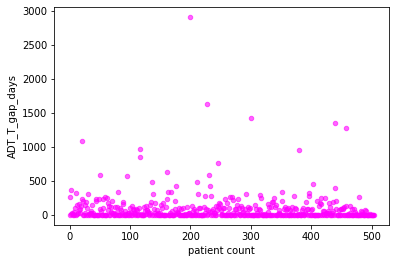

In [31]:
###scatter plot of the time gap from ADT end to first T test afterwards 
adttgap=df_clean_for_gap[['ADT_T_gap_days']].reset_index()
adttgap2=adttgap.reset_index()
adttgap2.columns = ['patient count','index2', 'ADT_T_gap_days']


ax=adttgap2.plot.scatter(x= "patient count", y="ADT_T_gap_days", c='magenta', alpha=0.6)
print(adttgap2.max())
print(adttgap2.min())

print(shape(adttgap))
#df_results['ADT_T_gap_days']

In [32]:
shape(adttgap2)

(505, 3)

In [33]:
adttgap2

,patient count,index2,ADT_T_gap_days
0,0,0,0.0
1,1,2,264.0
2,2,4,365.0
3,3,5,14.0
4,4,6,25.0
...,...,...,...
500,500,917,0.0
501,501,918,0.0
502,502,927,0.0
503,503,930,0.0


In [34]:
print(adttgap.max())

index              935.0
ADT_T_gap_days    2910.0
dtype: float64


In [35]:
adttgap.reset_index()[:5]

,level_0,index,ADT_T_gap_days
0,0,0,0.0
1,1,2,264.0
2,2,4,365.0
3,3,5,14.0
4,4,6,25.0


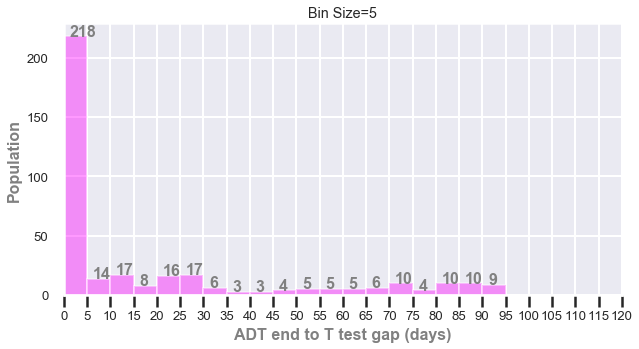

In [36]:
###plot
#adttgap['ADT_T_gap_days']

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=5

bins=np.arange(0, 100, binsize)
fig, ax = plt.subplots(figsize = (10,5))

(n, bins, patches) = plt.hist(adttgap['ADT_T_gap_days'], bins=bins,color="Magenta", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("ADT end to T test gap (days)", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1800, 5))
ax.set_xticklabels(np.arange(0, 1800, 5))
ax.set_xlim([0, 120])

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [37]:
205+6+8+5+10+13+7+3+3+1+4+5+5+5+8+4+7+9+9

317

# Histgram for number of T dates 

index        935
N_T_dates     93
dtype: int64
index        0
N_T_dates    1
dtype: int64


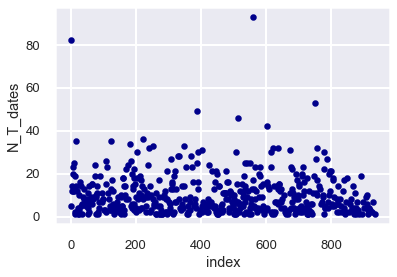

In [38]:
tnumber= df_results[["N_T_dates"]].reset_index()
ax=tnumber.plot.scatter(x= "index", y="N_T_dates", c='DarkBlue')
print(tnumber.max())
print(tnumber.min())

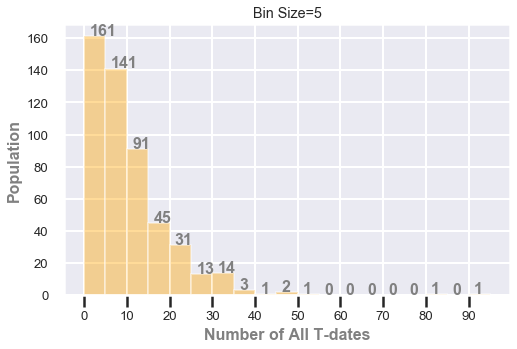

In [39]:
###plot the all T test number histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=5

bins=np.arange(0, 100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

(n, bins, patches) = plt.hist(tnumber["N_T_dates"], bins=bins,color="orange", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("Number of All T-dates", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 100, 10))
ax.set_xticklabels(np.arange(0, 100, 10))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

index                 935
N_T_dates_afterADT     43
dtype: int64
index                 0
N_T_dates_afterADT    1
dtype: int64


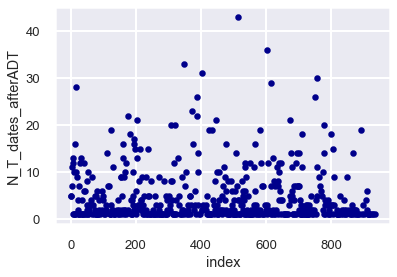

In [40]:
#histgram for number of T dates after ADT
t_after_adt_number= df_results[["N_T_dates_afterADT"]].reset_index()
ax=t_after_adt_number.plot.scatter(x= "index", y="N_T_dates_afterADT", c='DarkBlue')
print(t_after_adt_number.max())
print(t_after_adt_number.min())

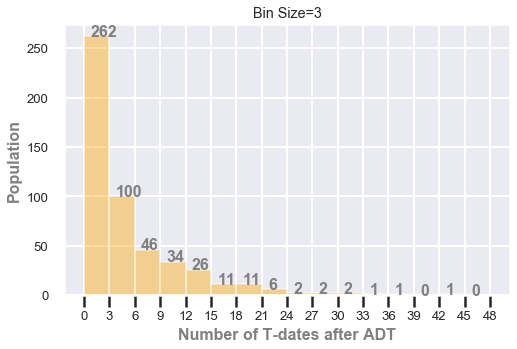

In [41]:
###plot histogram for T test number after ADT end date 

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=3

bins=np.arange(0, 50, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#t_after_adt_number= df_results[["N_T_dates_afterADT"]].reset_index()
(n, bins, patches) = plt.hist(t_after_adt_number["N_T_dates_afterADT"], bins=bins,color="orange", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("Number of T-dates after ADT", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 50, 3))
ax.set_xticklabels(np.arange(0, 50, 3))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

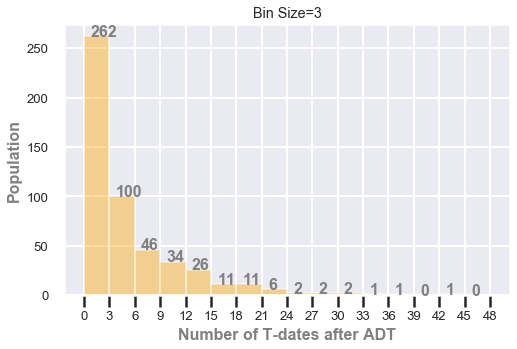

In [42]:
#Get rid of the zero T-dates 
t_after_adt_number= t_after_adt_number[t_after_adt_number["N_T_dates_afterADT"] != 0]

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=3

bins=np.arange(0, 50, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#t_after_adt_number= df_results[["N_T_dates_afterADT"]].reset_index()
(n, bins, patches) = plt.hist(t_after_adt_number["N_T_dates_afterADT"], bins=bins,color="orange", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("Number of T-dates after ADT", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 50, 3))
ax.set_xticklabels(np.arange(0, 50, 3))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [43]:
df_results.to_csv("Tdate_Tvalue_ADT_940pt_window_Immediately_after_ADT_ends.csv", encoding='utf-8', index=False)

In [44]:
#Fix the T values that contain <; plot the histograms and make the presentation slides

In [45]:
###Need to fix this later

#df_results_select3=df_results_select2
#df_results_select3['Tvalue'][ind].str[1:]
#fixed_string_list=[]
#for ind in df_results_select2.index:
 
#    if (df_results_select3['Tvalue'][ind].str.contains('<')): 
#        fixed_string_list.append(ind)  
#        df_results_select3['Tvalue'][ind]=df_results_select3['Tvalue'][ind].str[1:]

#df_results_select3.loc[df_results_select3['Tvalue'].str.contains('<'), '<']=""
#s[1:]

In [47]:
df4=pd.read_csv("./data/Tdate_Tvalue_ADT_940pt_fixed_window_Immediately_after_ADT_ends.csv", header=0)

In [49]:
df4[:3]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT,ADT_T_gap,ADT_T_gap_days
0,2,2/1/17,2897,2/1/17,15.64,82,5,0 days 00:00:00.000000000,0
1,18,3/13/14,121,12/2/14,31.30,5,5,264 days 00:00:00.000000000,264
2,25,2/18/14,98,2/18/15,149.89,12,11,365 days 00:00:00.000000000,365


In [50]:
index_list=df4.columns
index_list

Index(['person_id', 'inital_ADT_end_date', 'Inital_ADT_time_window_days',
       'Tdate immediately after ADT', 'Tvalue', 'N_T_dates',
       'N_T_dates_afterADT', 'ADT_T_gap', 'ADT_T_gap_days'],
      dtype='object')

In [51]:
print(df4.shape) 
df4[:5]
df4.dropna(subset=['Tvalue'], inplace=True)
print(df4.shape) 

(505, 9)
(505, 9)


In [52]:
df4=df4.reset_index()

index                           504
Inital_ADT_time_window_days    5442
dtype: int64
index                          0
Inital_ADT_time_window_days    0
dtype: int64


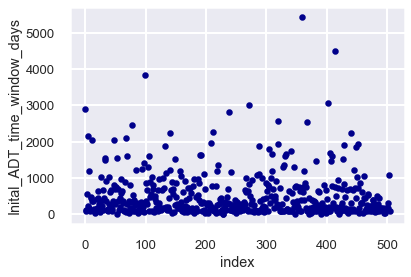

In [53]:
gap = df4[["Inital_ADT_time_window_days"]].reset_index()
ax=gap.plot.scatter(x= "index", y="Inital_ADT_time_window_days", c='DarkBlue')
print(gap.max())
print(gap.min())

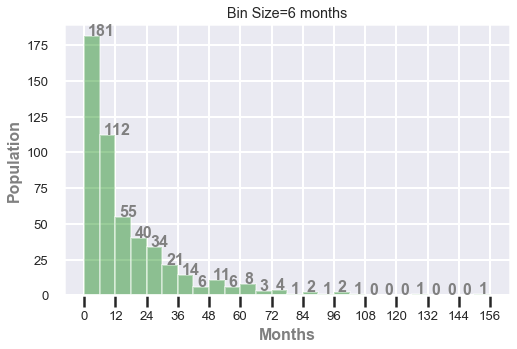

In [54]:
###for the 416 pt cohort
###plot the ADT window histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 4800, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(gap["Inital_ADT_time_window_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 4800, 360))
ax.set_xticklabels(np.arange(0, 160, 12))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()


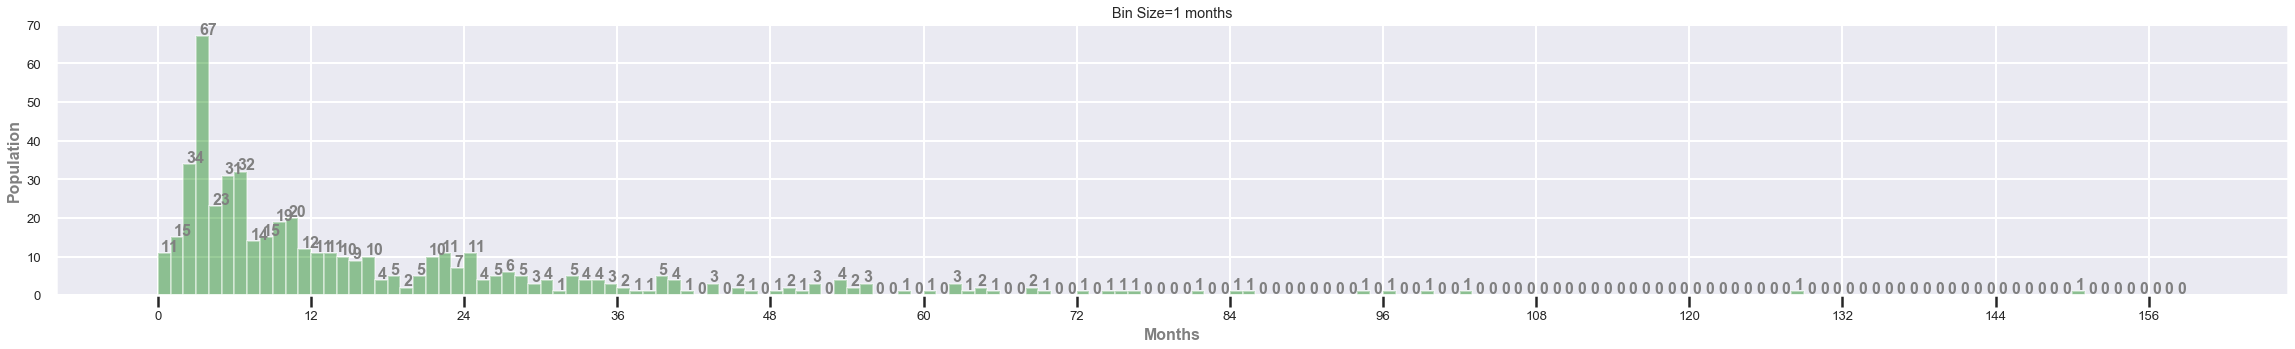

In [55]:
###for the 416 pt cohort
###plot the ADT window histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=30

bins=np.arange(0, 4800, binsize)
fig, ax = plt.subplots(figsize = (40,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(gap["Inital_ADT_time_window_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 4800, 360))
ax.set_xticklabels(np.arange(0, 160, 12))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



index      504.00
Tvalue    1083.86
dtype: float64
index     0.0
Tvalue    0.0
dtype: float64


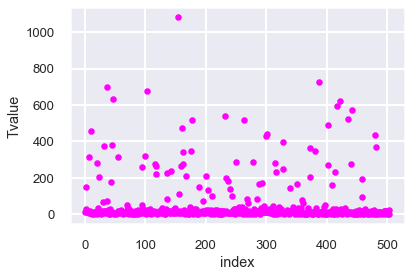

In [56]:
Tvalue = df4[["Tvalue"]].reset_index()
ax=Tvalue.plot.scatter(x= "index", y="Tvalue", c='Magenta')
print(Tvalue.max())
print(Tvalue.min())

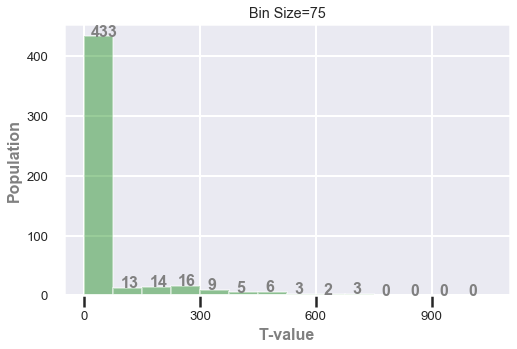

In [57]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=75

bins=np.arange(0, 1100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(Tvalue["Tvalue"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1100, 300))
ax.set_xticklabels(np.arange(0, 1100, 300))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



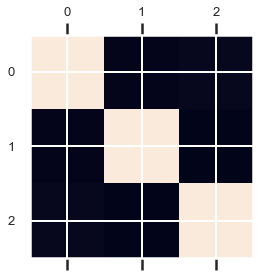

In [58]:
Correlation = df4[["Inital_ADT_time_window_days","Tvalue"]].reset_index()
plt.matshow(Correlation.corr())

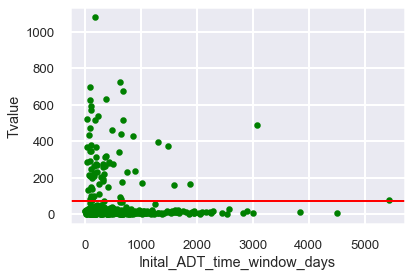

In [59]:
ax=Correlation.plot.scatter(x= "Inital_ADT_time_window_days", y="Tvalue", c='green')
plt.axhline(y=75, color='r', linestyle='-')

In [60]:
df_clean_for_gap[:5]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate immediately after ADT,Tvalue,N_T_dates,N_T_dates_afterADT,ADT_T_gap,ADT_T_gap_days
0,2,2017-02-01,2897.0,2017-02-01,15.64,82,5,0 days,0.0
2,18,2014-03-13,121.0,2014-12-02,31.3,5,5,264 days,264.0
4,25,2014-02-18,98.0,2015-02-18,149.89,12,11,365 days,365.0
5,26,2016-06-01,553.0,2016-06-15,15.75,14,7,14 days,14.0
6,37,2016-09-02,2165.0,2016-09-27,14.74,23,1,25 days,25.0


In [61]:
df_clean_for_gap.Tvalue

0       15.64
2        31.3
4      149.89
5       15.75
6       14.74
        ...  
917     18.15
918         3
927     11.65
930      4.33
935        23
Name: Tvalue, Length: 505, dtype: object